<a href="https://colab.research.google.com/github/MuhammadRifatA/ML/blob/main/MLJB_Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
# import package
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [91]:
# baca data dari file CSV
dt = pd.read_csv('/content/sample_data/insurance.csv')

In [92]:
# melihat beberapa data awal
dt.head()
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


1.Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

In [93]:
le = LabelEncoder() # membuat objek dari LabelEncoder
dt['sex'] = le.fit_transform(dt['sex']) # proses encoding
dt['smoker'] = le.fit_transform(dt['smoker'])
dt.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [94]:
X = dt[['age', 'sex', 'bmi', 'children', 'smoker']]
y = dt['charges']

2.Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

In [95]:
# Pembagian data latih dan data uji dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


3.Lakukan feature scaling jika diperlukan.

In [96]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Hitung statistik (mean dan deviasi standar) dari data pelatihan dan lakukan scaling pada data pelatihan
X_train_scaled = scaler.fit_transform(X_train)

# Gunakan statistik yang sama untuk melakukan scaling pada data uji
X_test_scaled = scaler.transform(X_test)

4.Buat model multiple linear regression menggunakan Scikit-Learn.

5.Latih model pada data latih dan lakukan prediksi pada data uji.

In [105]:

from sklearn.linear_model import LinearRegression

# Latih model pada data latih dan prediksi pada data uji

# membuat model regresi
model = LinearRegression()

# latih model pada data latih
model.fit(X_train, y_train)

# melakukan prediksi pada data uji
prediksi = model.predict(X_test)


6.Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

In [106]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# menghitung matrik R-squared, MSE, MAE

# menghitung R-squared
r2 = r2_score(y_test, prediksi)

# menghitung MSE
mse = mean_squared_error(y_test, prediksi)

# menghitung mae
mae = mean_absolute_error(y_test, prediksi)

print("R-squared : ", r2)
print("MSE : ", mse)
print("MAE : ", mae)


R-squared :  0.780095696440481
MSE :  31929596.873382222
MAE :  3896.078705469495


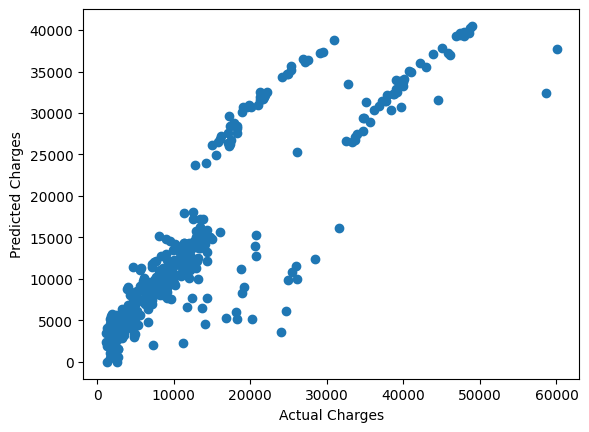

In [107]:
plt.scatter(y_test, prediksi)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.show()
